In [10]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

np.random.seed(42)

In [3]:
# Import data

cwd = Path.cwd()
datapath = (cwd.parent.parent / 'problem-sets/PS2/data/').resolve()

dftrain = pd.read_csv(datapath / 'ds5_train.csv')
dftest = pd.read_csv(datapath / 'ds5_test.csv')

In [4]:
dftrain.head(5)

,y,x0,x1
0,0.0,2.045879,0.527577
1,0.0,3.141297,-2.710994
2,0.0,2.024408,-2.421318
3,0.0,-2.839698,-0.461027
4,0.0,-0.775565,-2.297494


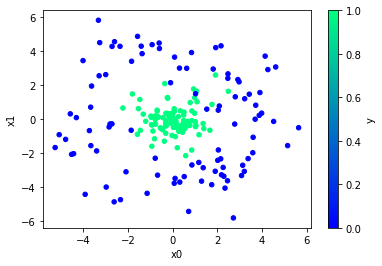

In [5]:
fig, ax = plt.subplots()
sc = dftrain.plot.scatter(x='x0', y='x1', c='y', colormap='winter', ax=ax)

In [13]:
ytrain = dftrain["y"]
xtrain = dftrain[["x0","x1"]]

ytest = dftest["y"]
xtest = dftest[["x0","x1"]]

y = pd.concat([ytrain,ytest])
x = pd.concat([xtrain,xtest])

In [11]:
log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42)

for clf in (log_clf,svm_clf): # , rnd_clf, svm_clf, voting_clf):
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print(clf.__class__.__name__, accuracy_score(ytest, ypred))

LogisticRegression 0.645
SVC 0.965


In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-6, 6, -6, 6], alpha=0.5, contour=True): # axes=[0, 8, 0, 8]
    X = X.to_numpy() # as_matrix() # added code to convert dataframe X to array X
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha) # 0 0
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

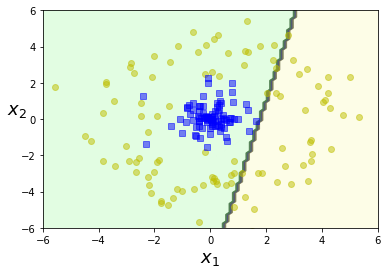

In [22]:
plot_decision_boundary(log_clf, xtest, ytest)

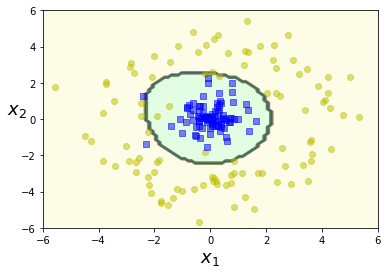

In [23]:
plot_decision_boundary(svm_clf, xtest, ytest)